In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics.cluster import pair_confusion_matrix


In [30]:
df = pd.read_csv("merged.csv")
df

,fried,part_id,activity_regular,gait_speed_4m,gait_get_up,cognitive_total_score,mmse_total_score,depression_total_score,health_rate,leisure_out,...,BathRoom,BedRoom,Entrance,Garage,Hall,Kitchen,LivingRoom,Office,Outdoor,Storage
0,0,1001,2.0,7.00,18.00,25.0,30,1.0,3.0,7.0,...,7.430730,32.304786,0.0,0.0,47.355164,0.000000,6.202771,0.000000,6.706549,0.0
1,1,1003,1.0,11.00,21.00,26.0,27,1.0,4.0,7.0,...,0.273620,0.000000,0.0,0.0,0.177048,77.804603,0.000000,0.000000,21.744729,0.0
2,1,1005,3.0,8.00,42.00,24.0,27,3.0,3.0,7.0,...,0.000000,0.000000,0.0,0.0,99.777667,0.000000,0.222333,0.000000,0.000000,0.0
3,0,1006,2.0,6.00,18.00,26.0,29,0.0,5.0,14.0,...,98.305596,0.683120,0.0,0.0,0.304725,0.391789,0.000000,0.000000,0.314771,0.0
4,0,1007,2.0,3.00,13.00,26.0,30,3.0,4.0,5.0,...,3.496115,71.624121,0.0,0.0,1.775805,0.000000,0.147984,0.000000,22.955975,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,1,3593,3.0,2.30,6.20,27.0,27,2.0,4.0,0.0,...,12.498823,0.847697,0.0,0.0,0.000000,8.985589,0.000000,76.678911,0.988980,0.0
269,0,3594,3.0,2.70,8.40,27.0,29,2.0,4.0,5.0,...,0.000000,0.000000,0.0,0.0,0.000000,99.975994,0.001847,0.001154,0.021005,0.0
270,0,3600,3.0,2.28,6.06,21.0,27,3.0,4.0,7.0,...,12.019929,3.923604,0.0,0.0,0.000000,0.000000,79.468549,0.000000,4.587918,0.0
271,1,3601,2.0,2.85,8.22,26.0,28,0.0,4.0,14.0,...,0.000000,0.014536,0.0,0.0,0.000000,0.000000,90.734180,0.007477,9.243806,0.0


In [31]:
true_label_names = df[['fried']]
true_label_names = np.array(true_label_names)

data = df.to_numpy()
#data = np.transpose(data)
data.shape

(273, 22)

In [32]:
data

array([[0.00000000e+00, 1.00100000e+03, 2.00000000e+00, ...,
        0.00000000e+00, 6.70654912e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00300000e+03, 1.00000000e+00, ...,
        0.00000000e+00, 2.17447288e+01, 0.00000000e+00],
       [1.00000000e+00, 1.00500000e+03, 3.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 3.60000000e+03, 3.00000000e+00, ...,
        0.00000000e+00, 4.58791779e+00, 0.00000000e+00],
       [1.00000000e+00, 3.60100000e+03, 2.00000000e+00, ...,
        7.47728448e-03, 9.24380601e+00, 0.00000000e+00],
       [0.00000000e+00, 3.61100000e+03, 3.00000000e+00, ...,
        0.00000000e+00, 4.99546691e+01, 0.00000000e+00]])

In [33]:
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(true_label_names)

true_labels

/Users/shortie/opt/anaconda3/envs/data_analysis/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 1, 0, 0,
       1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 1,
       2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0,
       2, 1, 0, 0, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 2,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 2, 1, 0, 0,
       0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0])

In [34]:
label_encoder.classes_

n_clusters = len(label_encoder.classes_)

In [35]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

In [36]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=100,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [37]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [38]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=3, n_init=100,
                                         random_state=42))]))])

In [39]:
preprocessed_data = pipe["preprocessor"].transform(data)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.39511350759762937

In [40]:
adjusted_rand_score(true_labels, predicted_labels)

0.20600237917300532

/Users/shortie/opt/anaconda3/envs/data_analysis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


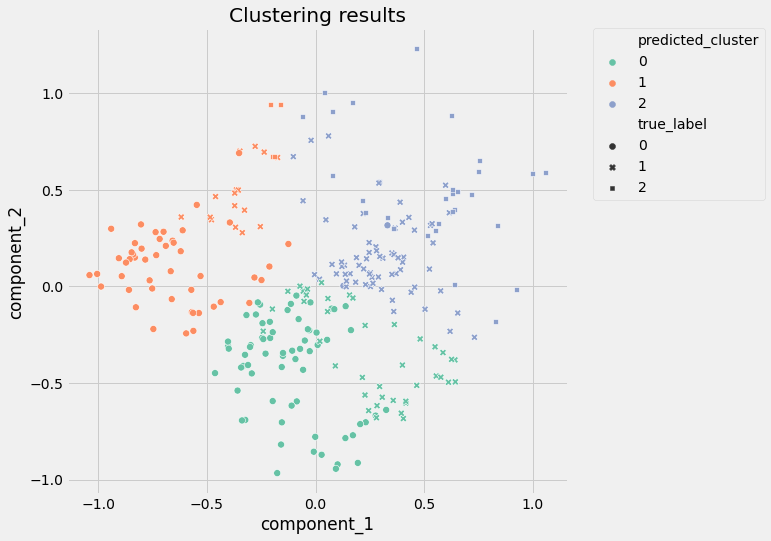

In [41]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [42]:
# Empty lists to hold evaluation metrics
silhouette_scores = []
ari_scores = []
for n in range(2, 11):
    # This set the number of components for pca,
    # but leaves other steps unchanged
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(data)

    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(data),
        pipe["clusterer"]["kmeans"].labels_,
    )
    ari = adjusted_rand_score(
        true_labels,
        pipe["clusterer"]["kmeans"].labels_,
    )

    # Add metrics to their lists
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

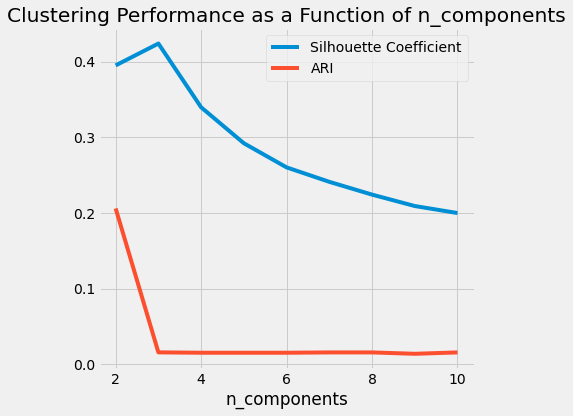

In [43]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 11),
    silhouette_scores,
    c="#008fd5",
    label="Silhouette Coefficient",
)
plt.plot(range(2, 11), ari_scores, c="#fc4f30", label="ARI")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()